In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
from sqlalchemy import *

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


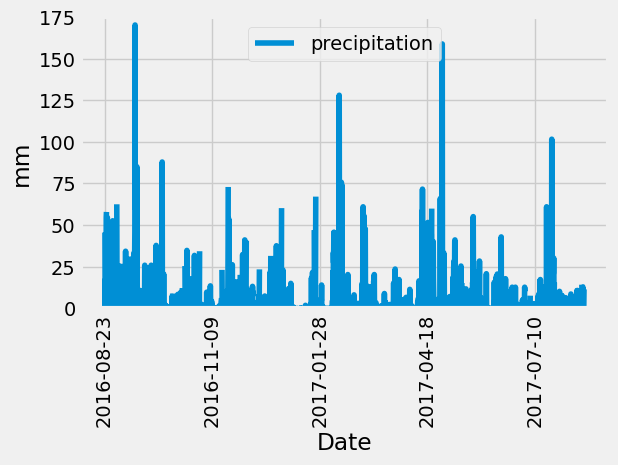

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago=dt.datetime(2017,8,23)-dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores

dates=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

df = pd.DataFrame(dates,columns=['Date','precipitation']).sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

df.set_index(df.Date,inplace=True)

df.plot()

plt.ylim(0,175)
plt.ylabel('mm')

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data

data={
       'precipitation':[df['precipitation'].count(),df['precipitation'].mean(),\
       df['precipitation'].std(),df['precipitation'].min(),df['precipitation'].quantile(0.25),\
       df['precipitation'].quantile(0.50),df['precipitation'].quantile(0.75),df['precipitation'].max()]
     }

preci_data=pd.DataFrame(data,index=['count','mean','std','min','25%','50%','75%','max'])

preci_data

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(Station.station).count()
print(total_stations)

9


In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station,(func.count(Measurement.station)).label('total')).\
                         filter(Measurement.station == Station.station).\
                         group_by(Measurement.station).order_by(desc('total'))
                  
for row in active_stations:
    print(row)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [35]:
# Most active station

most_active = active_stations[0][0]
print(most_active)

USC00519281


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp_analysis = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                        filter(Measurement.station == most_active)
for i in temp_analysis:
    print(i)

(12.2, 29.4, 22.03582251082252)


In [37]:
#Finding recent date of most active station

active_recent_date = session.query(Measurement.date).filter(Measurement.station == most_active).\
                     order_by(Measurement.date.desc()).first()

print(active_recent_date)


('2017-08-18',)


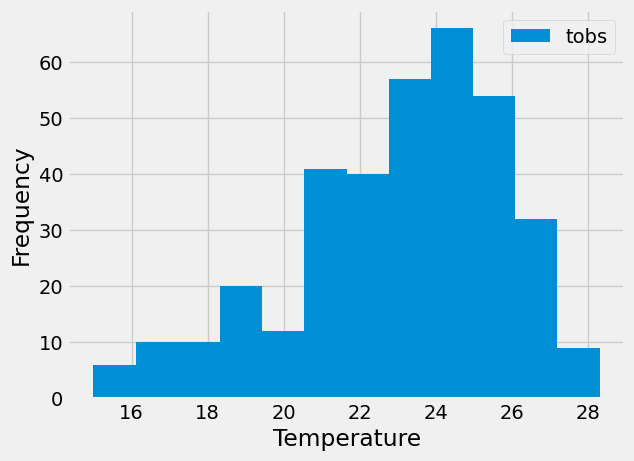

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_recent_date=dt.date(2017,8,18)

active_year_ago=dt.date(2017,8,18)-dt.timedelta(days=365)

temp=session.query(Measurement.tobs).filter(Measurement.station==most_active). \
                                     filter(Measurement.date >= active_year_ago). \
                                     filter(Measurement.date <= active_recent_date).all()

df = pd.DataFrame(temp,columns=['tobs']).sort_values('tobs')

df.set_index(df.tobs,inplace=True)

df.plot.hist(bins=12)

plt.xlabel("Temperature")

plt.show()


# Close Session

In [39]:
# Close Session
session.close()